### Practical 25

### Implement K-Means clustering for obtaining optimal no. of clusters and their centroids on Mall_Customers dataset.

In [1]:
# Dunn Index = min(Inter cluster distance)/max(Intra cluster distance)
# Intra cluster distance should be high and inter cluster distance should be low

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Importing the dataset
# from the dataset, we need to find some patterns in it.
dataset = pd.read_csv("D:/ML Dataset/Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
# Extracting Independent Variables only.

# Here we don't need any dependent variable for data pre-processing step as it is a clustering problem. 
# and we have no idea about what to determine.
# So we will just need a matrix of features or independent variables only.

x = dataset.iloc[:,[3,4]].values
x[0:10]
# we are extracting only 3rd and 4th feature.
# Because to visualize the 2-D plot of model some features such as customer_id and are not required.

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

In [5]:
# Finding the optimal number of clusters using the elbow method

# We import the KMeans class of sklearn.cluster library to form the clusters.

from sklearn.cluster import KMeans

# Next, we have created the wcss_list variable to initialize an empty list
# which is used to contain the values of wcss computed for different values of k random

wcss_list = [] #Initializing the list for the values of WCSS.

# using for loop for iterations from 1 to 10.
# Now we initialize the for loop for th eiteration on a different value of k ranging form 1 to 10.
# Since for loop in python, exclude the outbound limit, so it is taken as 11 to include 10th value.
# kmeans.inertia_attribute is : sum of squared distances of samples to their closest cluster center.

In [6]:
# Within - Cluster - Sum - of - Squares (WCSS)
# It calculates the sum of the squares of distances of the data point each and every cluster from its centroid.
# The main idea is to minimize the distance between the data points and centroid of the clusters.
# The process is iterated until we reach a minimum value for the sum of distances.

In [7]:
# execute the k-means clustering value
# calculate wcss value for each value

# silhoot graph


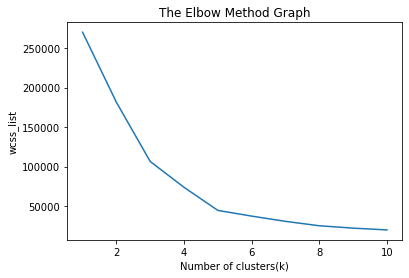

In [8]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_) # inertia_ is a pre-defied attribute of KMeans
plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [9]:
# install kneed library using the command: conda install -c conda-forge kneed

In [10]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss_list, curve = "convex", direction = 'decreasing')
kl.elbow
# Since the elbow point is at 5. So the number of clusters here will be 5.


5

In [17]:
# Training the K-means algorithm on the training dataset

#To train the model, we'll be using the same two lines of code as above
#but here instead of using i, we will use 5, as we know there are 5 cluster that need to 

# Training the K-means model on a dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1)

#we are going to use the fit predict method that returns for each observation 

y_predict = kmeans.fit_predict(x)
#In the second line of code, we have created the dependent variable y_predict to train the 

# By executing the above lines of code, we will get the y_predict variable.

In [18]:
y_predict


array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

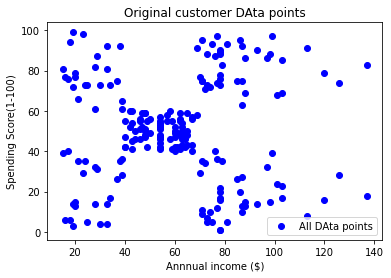

In [19]:
# Visualizing Original Data Points without clustering

plt.scatter(x[:,0],x[:,1],c="blue", label="All DAta points")
plt.title('Original customer DAta points')
plt.xlabel('Annnual income ($)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

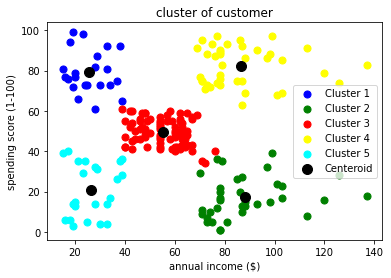

In [24]:
# For first cluster

plt.scatter(x[y_predict == 0,0], x[y_predict == 0,1], s=50, c='blue', label='Cluster 1')

# For second cluster

plt.scatter(x[y_predict == 1,0], x[y_predict == 1,1], s=50, c='green', label='Cluster 2')

# For third cluster

plt.scatter(x[y_predict == 2,0], x[y_predict == 2,1], s=50, c='red', label='Cluster 3')

# For forth cluster

plt.scatter(x[y_predict == 3,0], x[y_predict == 3,1], s=50, c='yellow', label='Cluster 4')

# For fifth cluster

plt.scatter(x[y_predict == 4,0], x[y_predict == 4,1], s=50, c='cyan', label='Cluster 5')

# Plot the centroid. This time we're going to use the kmeans.Cluster_centers_
# attribute that returns here the coordinates of the centroid.

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'black', label='Centeroid' )
plt.title("cluster of customer")
plt.xlabel("annual income ($)")
plt.ylabel("spending score (1-100)")
plt.legend()
plt.show()

In [25]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


In [26]:
labels = kmeans.labels_
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])